### **RISCO DE FOGO: QUEIMADAS NO CERRADO**
<hr>
<p align="justify">
Este trabalho é referente as tarefas desenvolvidas no Bloco 1. Espera-se desenvolver um projeto capaz de utilizar os comandos aprendidos pela linguagem de programação Python, na disciplina de Aprendizado de Máquina, além de desenvolver um sistema de previsão através de Machine Learning. O grupo desenvolvedor é composto pelas discentes:
<p align="justify">
Isabela Bento Beneti </p>
<p align="justify">
Monyque Karoline de Paula Silva </p>
<p align="justify">
Sofia Baccega C.C. de Oliveira </p>
<p align="justify">
Sophia Figueiredo Michel </p>
<hr>

### **Início:**
<p align="justify">
Em um primento momento, iremos demonstrar o processo de tratamento dos dados obtidos via Database do INPE a respeito dos focos de incêndio ocorridos no Cerrado durante o período Janeiro-Julho(2022). É necessário realizar as padronizações de bibliotecas inicias, como a Pandas, Seaborn e Matplotlib, posteriormente, trabalha-se os dados até a otimização destes para a análise dos atríbutos escolhidos.
</p>

### **Coleta:**



In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [8]:
#Dados do Cerrado Brasileiro, armazenados mensalmente via .csv
arquivos = ['janeiro.csv','fev.csv','marco.csv','abril.csv','maio.csv','junho.csv','julho.csv']

In [9]:
def read_csv(list_of_files):
    dfs = []
    for x in list_of_files:
        file = pd.read_csv(x, sep=',')
        dfs.append(file)
    df = pd.concat(dfs).reset_index(drop=True)
        
    return df

In [10]:
meses = read_csv(arquivos)

In [11]:
#Dados trabalhados para a eliminação de NaN nas colunas e identificação dos tipos de dados
meses.convert_dtypes()
meses.dropna(how='any', inplace=True)

In [12]:
meses_fogo = meses['risco_fogo'] > 0
meses = meses[meses_fogo]

meses.describe

<bound method NDFrame.describe of         Unnamed: 0        lat        lon        data_hora_gmt   satelite  \
775         100199 -12.314859 -43.234066  2022-03-02 01:05:48   NOAA-18D   
778         101128 -20.227880 -46.415940  2022-03-02 01:28:00  TERRA_M-M   
779         101129 -20.229250 -46.426820  2022-03-02 01:28:00  TERRA_M-M   
780         101130 -20.238930 -46.425510  2022-03-02 01:28:00  TERRA_M-M   
781         101132 -20.237550 -46.414600  2022-03-02 01:28:00  TERRA_M-M   
...            ...        ...        ...                  ...        ...   
287431     3605578  -6.360000 -45.670000  2022-07-29 23:54:47    GOES-16   
287432     3605579  -6.360000 -45.690000  2022-07-29 23:54:47    GOES-16   
287433     3605580  -6.400000 -44.140000  2022-07-29 23:54:47    GOES-16   
287434     3605581  -6.350000 -45.670000  2022-07-29 23:54:47    GOES-16   
287435     3605582  -6.340000 -45.690000  2022-07-29 23:54:47    GOES-16   

                 municipio        estado    pais  mun

<p align="justify">
Eliminado as linhas dos dados não atribuidos(NaN), as desenvolvedoras optaram pelo uso do comando drop, do Pandas, de modo a selecionar as colunas não desejadas do arquvivo .csv, otimizando o processo de análise de dados.
</p>

In [14]:
## Para rodar o código pela primeira vez, descomente essas linhas

meses.drop(columns=['Unnamed: 0', 'estado', 'satelite', 'municipio', 'pais', 'municipio_id', 'estado_id', 'pais_id', 'bioma'], axis = 1, inplace=True)

<p align="justify">
Realizada o processo de seleção de colunas, o próximo passo consiste na identificação dos tipos de dados utilizados em cada coluna e especificamente, em nosso caso, na identificação se dé fato só está sendo utilizado as variáveis numéricas.     
</p>

In [15]:
meses.dtypes, meses.shape

(lat                      float64
 lon                      float64
 data_hora_gmt             object
 numero_dias_sem_chuva    float64
 precipitacao             float64
 risco_fogo               float64
 dtype: object,
 (265141, 6))

<p align="justify"> Realizada o procedimento de identificação dos tipos de dados existentes no código, inicia-se o processo de normalização de dados. Ela é ocorrente por meio do comando "zscore". Esse processo de normalização é extremamente importante para análises estátisticas, principalmente ao considerar que esse processo é remetente a transformação em escala da distribuição de uma variável para poder fazer comparações entre conjunto de elementos, evitando o efeito de influências. 
</p>

In [27]:
c_maximo = meses['numero_dias_sem_chuva'].max()
c_minimo = meses['numero_dias_sem_chuva'].min()

p_maximo = meses['precipitacao'].max()
p_minimo = meses['precipitacao'].min()

lat_maximo = meses['lat'].max()
lat_minimo = meses['lat'].min()

lon_maximo = meses['lon'].max()
lon_minimo = meses['lon'].min()

meses['numero_dias_sem_chuva'] = (meses['numero_dias_sem_chuva'] - c_minimo) / (c_maximo - c_minimo)
meses['precipitacao'] = (meses['precipitacao'] - p_minimo) / (p_maximo - p_minimo)
meses['lat'] = (meses['lat'] - lat_minimo) / (lat_maximo - lat_minimo)
meses['lon'] = (meses['lon'] - lon_minimo) / (lon_maximo - lon_minimo)


meses

,lat,lon,data_hora_gmt,numero_dias_sem_chuva,precipitacao,risco_fogo
775,0.553338,0.916209,2022-03-02 01:05:48,0.893617,0.128266,1.0
778,0.197437,0.742633,2022-03-02 01:28:00,0.892730,0.000000,0.3
779,0.197376,0.742040,2022-03-02 01:28:00,0.892730,0.000000,0.3
780,0.196940,0.742111,2022-03-02 01:28:00,0.892730,0.000000,0.4
781,0.197002,0.742706,2022-03-02 01:28:00,0.892730,0.000000,0.4
...,...,...,...,...,...,...
287431,0.821167,0.783325,2022-07-29 23:54:47,0.926418,0.000000,1.0
287432,0.821167,0.782234,2022-07-29 23:54:47,0.926418,0.000000,1.0
287433,0.819368,0.866789,2022-07-29 23:54:47,0.915780,0.000000,1.0
287434,0.821617,0.783325,2022-07-29 23:54:47,0.926418,0.000000,1.0


## Análise de Dados

<p align="justify"> De modo a analisar os dados obtidos, identifica-se informações estatísticas sobre cada amostra mensal de dados. Inicialmente, realiza-se o plot da descrição estátisca dos dados, como obter, por exemplo: a média e a moda. Em seguida, realiza-se o plot dos gráficos por meio de uma matriz de covariância e correlação entre os atríbutos para analisar as relações entre os atributos.
    </p>

In [28]:
meses.describe()

,lat,lon,numero_dias_sem_chuva,precipitacao,risco_fogo
count,265141.000000,265141.000000,265141.000000,265141.000000,265141.000000
mean,0.568449,0.645772,0.904686,0.004692,0.850110
std,0.194516,0.218944,0.053648,0.029065,0.255347
min,0.000000,0.000000,0.000000,0.000000,0.010000
25%,0.462508,0.540026,0.891844,0.000000,0.800000
50%,0.574695,0.701880,0.903369,0.000000,1.000000
75%,0.712281,0.808499,0.918440,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


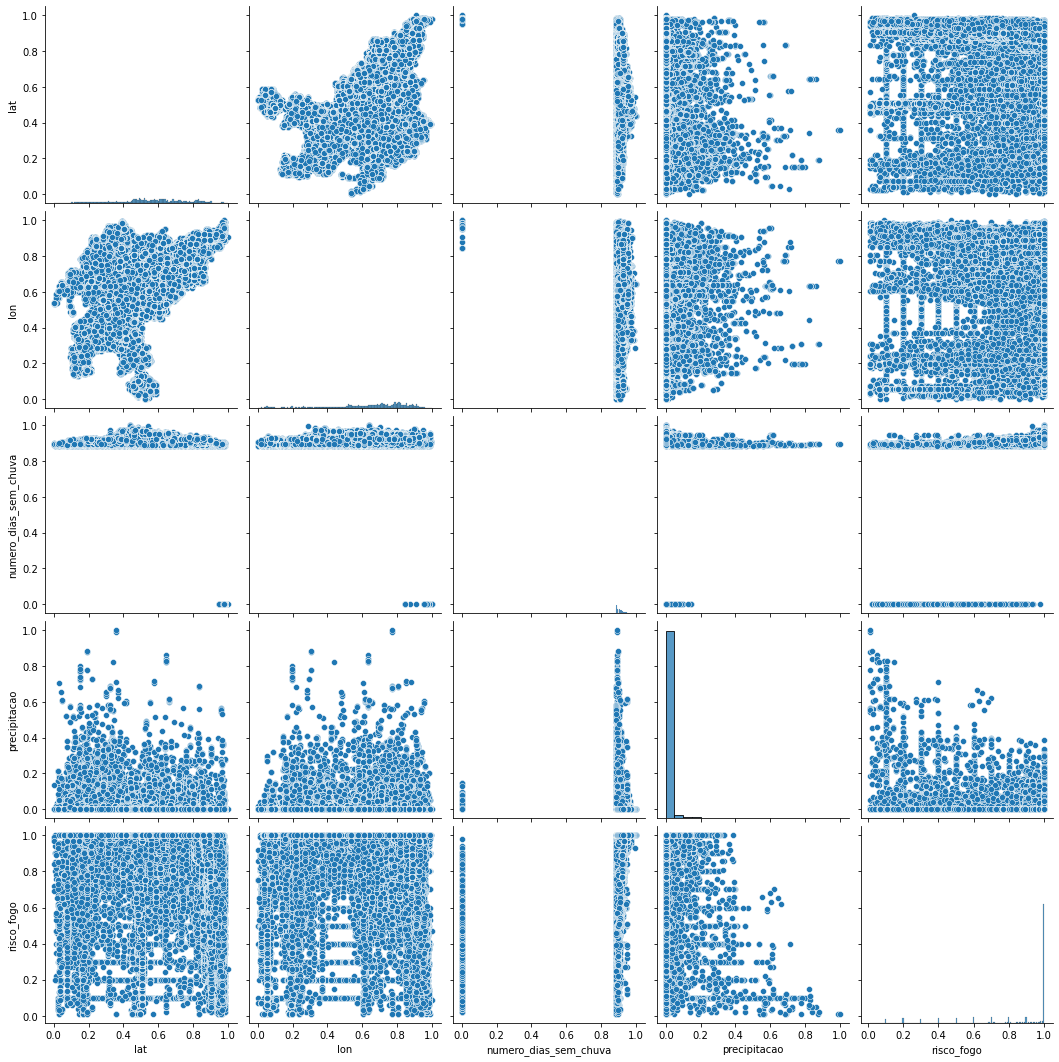

In [29]:
# Matriz de gráficos scatter 
sns.pairplot(meses, height=3);

# mostra o gráfico usando a função show() da matplotlib
plt.show()

In [30]:
# Matriz de covâriancia
mes_covariancia = meses.cov()

# Matriz de correlação
mes_correlacao = meses.corr()

print('Matriz de covariância: ')
display(mes_covariancia)

print('\n\nMatriz de correlação: ')
display(mes_correlacao)

Matriz de covariância: 


,lat,lon,numero_dias_sem_chuva,precipitacao,risco_fogo
lat,0.037837,0.019174,-0.000855,-0.000607,0.001745
lon,0.019174,0.047936,-0.000836,-0.000261,0.006561
numero_dias_sem_chuva,-0.000855,-0.000836,0.002878,-0.000060,0.003436
precipitacao,-0.000607,-0.000261,-0.000060,0.000845,-0.001744
risco_fogo,0.001745,0.006561,0.003436,-0.001744,0.065202




Matriz de correlação: 


,lat,lon,numero_dias_sem_chuva,precipitacao,risco_fogo
lat,1.000000,0.450228,-0.081947,-0.107322,0.035142
lon,0.450228,1.000000,-0.071204,-0.041089,0.117348
numero_dias_sem_chuva,-0.081947,-0.071204,1.000000,-0.038392,0.250796
precipitacao,-0.107322,-0.041089,-0.038392,1.000000,-0.234956
risco_fogo,0.035142,0.117348,0.250796,-0.234956,1.000000


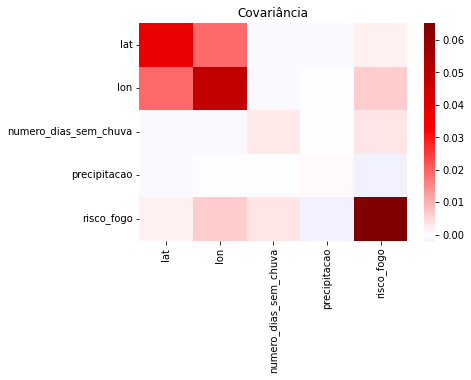

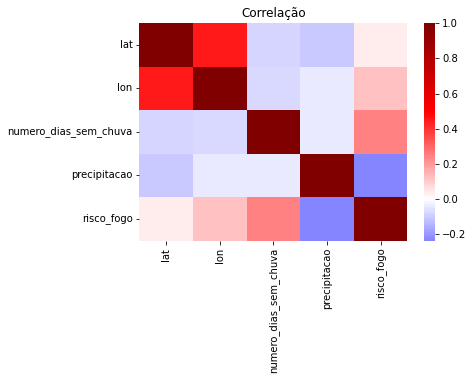

In [31]:
#Criando um mapa de cores dos valoes da covariancia
sns.heatmap(mes_covariancia, 
        xticklabels=mes_covariancia.columns,
        yticklabels=mes_covariancia.columns,
           cmap='seismic',
           center = 0)

plt.title('Covariância')
plt.show()

#Criando um mapa de cores dos valoes da correlação
sns.heatmap(mes_correlacao, 
        xticklabels=mes_correlacao.columns,
        yticklabels=mes_correlacao.columns,
           cmap='seismic',
           center = 0)

plt.title('Correlação')
plt.show()

<AxesSubplot:xlabel='risco_fogo', ylabel='numero_dias_sem_chuva'>

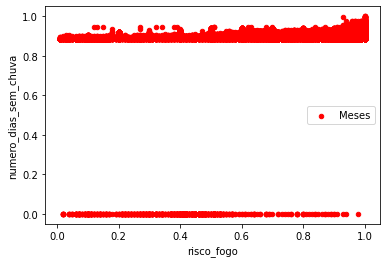

In [33]:
ax = meses.plot(kind='scatter', x="risco_fogo", y="numero_dias_sem_chuva", color='Red', label="Meses")

plt.show()

<AxesSubplot:ylabel='Frequency'>

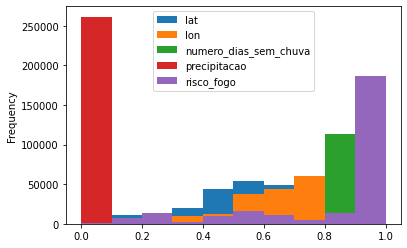

In [34]:
meses.plot(kind='hist')